In [23]:
from PIL import Image
import cv2
import numpy as np
import time
import torch
import torchvision
from torch.utils.data import Dataset
from torchvision import transforms
import albumentations
import matplotlib.pyplot as plt

In [24]:
class TorchvisionDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]

        image = Image.open(file_path)

        start_t = time.time()
        if self.transform:
            image = self.transform(image)
        total_time = (time.time() - start_t)

        return image, label, total_time

In [25]:
torchvision_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

torchvision_dataset = TorchvisionDataset(
    file_paths=["2021-11-02-17-09-33.png"],
    labels=[1],
    transform=torchvision_transform,
)

torchvision time/sample: 13.020884990692139 ms


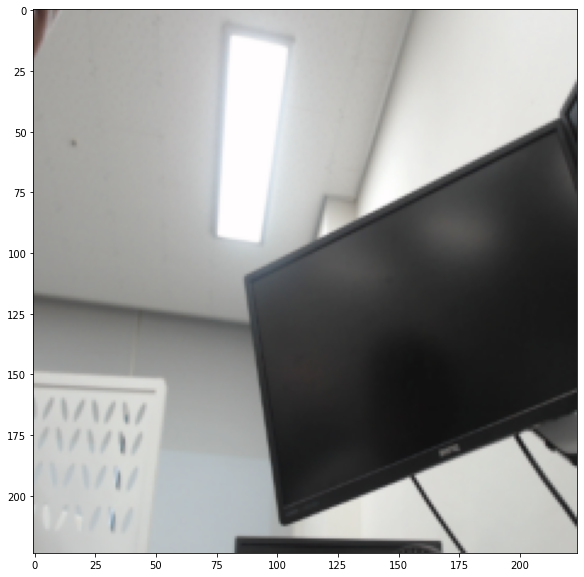

In [27]:
total_time = 0
for i in range(100):
  sample, _, transform_time = torchvision_dataset[0]
  total_time += transform_time

print("torchvision time/sample: {} ms".format(total_time*10))

plt.figure(figsize=(10, 10))
plt.imshow(transforms.ToPILImage()(sample))
plt.show()

In [6]:

class AlbumenetationsDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        label = self.labels[idx]
        file_path = self.file_paths[idx]

        image = cv2.imread(file_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        start_t = time.time()
        if self.transform:
            augmented = self.transform(image=image)
            image = augmented['image']
            total_time = (time.time() - start_t)
        return image, label, total_time

In [7]:
from albumentations.pytorch import transforms

albumentations_transform = albumentations.Compose([
    albumentations.Resize(256,256),
    albumentations.RandomCrop(224,224),
    albumentations.HorizontalFlip(),
    transforms.ToTensorV2()
    ])

albumentations time/sample : 0.36296606063842773 ms


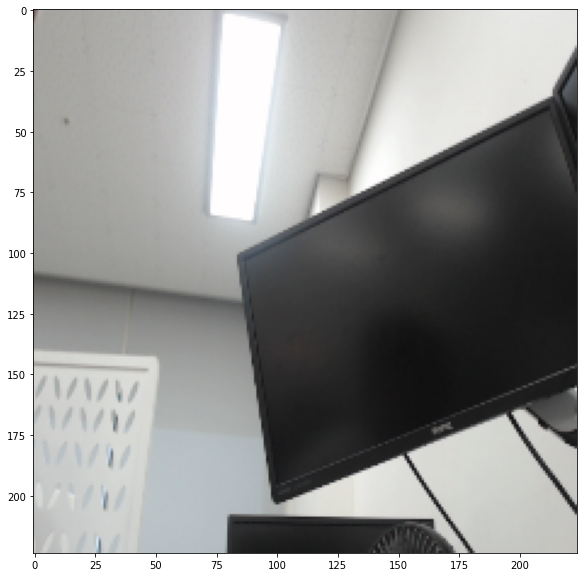

In [15]:
albumentations_dataset = AlbumenetationsDataset(
    file_paths=['2021-11-02-17-09-33.png'],
    labels=[1],
    transform=albumentations_transform
)
total_time = 0
for i in range(100):
    sample, _, transform_time = albumentations_dataset[0]
    total_time += transform_time

print('albumentations time/sample : {} ms'.format(total_time*10))

plt.figure(figsize=(10,10))
plt.imshow(torchvision.transforms.ToPILImage()(sample))
plt.show()

In [16]:
albumentations_transform_oneof = albumentations.Compose([
    albumentations.Resize(256,256),
    albumentations.RandomCrop(224,224),
    albumentations.OneOf([
        albumentations.HorizontalFlip(p=1),
        albumentations.RandomRotate90(p=1),
        albumentations.VerticalFlip(p=1)
    ],p=1),
    albumentations.OneOf([
        albumentations.MotionBlur(p=1),
        albumentations.OpticalDistortion(p=1),
        albumentations.GaussNoise(p=1)
    ],p=1),
    transforms.ToTensorV2()
])

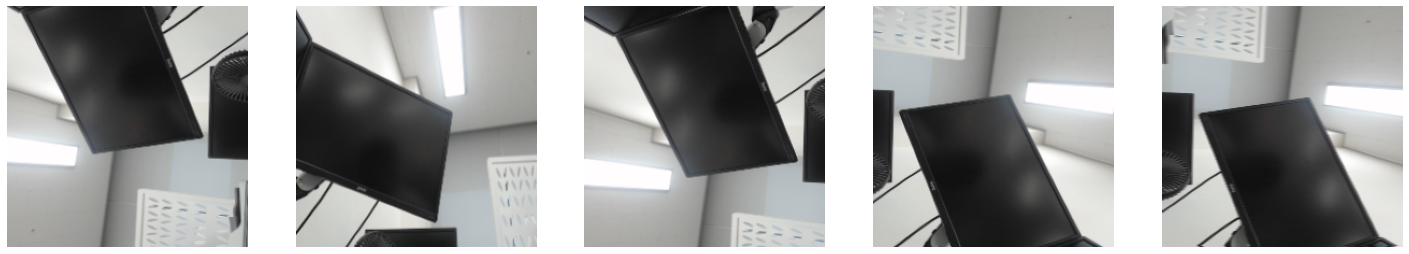

In [21]:
albumentations_dataset = AlbumenetationsDataset(
    file_paths=["2021-11-02-17-09-33.png"],
    labels=[1],
    transform=albumentations_transform_oneof
)
num_samples = 5
fig, ax = plt.subplots(1, num_samples, figsize=(25, 5))
for i in range(num_samples):
  ax[i].imshow(torchvision.transforms.ToPILImage()(albumentations_dataset[0][0]))
  ax[i].axis('off')

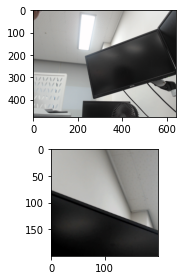

In [28]:
import albumentations as A
import matplotlib.pyplot as plt
import cv2

transforms = A.Compose([
    A.RandomCrop(width=200, height=200),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=1),
])
image = cv2.imread('2021-11-02-17-09-33.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transformed = transforms(image=image)
transformed_image = transformed['image']

plt.subplot(2,1,1)
plt.imshow(image)

plt.subplot(2,1,2)
plt.imshow(transformed_image)
plt.tight_layout()

kp1 :  523
kp2 :  1021
matches :  523
good matches :  80
